In [8]:



tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-base')


# T5 inference
input_ids = tokenizer("summarize: The tower is 324 metres (1,063 ft) tall, ", return_tensors="pt").input_ids  # Batch size 1
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
# studies have shown that owning a dog is good for you.

....tt.t.t.


In [2]:
import transformers

from transformers import T5Tokenizer, T5ForConditionalGeneration
from transformers import BartForConditionalGeneration,BartTokenizer
import datasets
from datasets import load_dataset


dataset = load_dataset('xsum',split='validation')


Using custom data configuration default
Reusing dataset xsum (/home/jcxu/.cache/huggingface/datasets/xsum/default/1.2.0/4957825a982999fbf80bca0b342793b01b2611e021ef589fb7c6250b3577b499)


In [40]:
import pickle
import pandas as pd

dump_name = 'outputdbs_50_13_25_0.8_1.0.pkl'
dump_name = 'outputbs_50_13_25_0.8_0.0.pkl'
with open(f"../{dump_name}",'rb') as fd:
    df =pickle.load(fd)
print(df)

                                                    gen  \
0     Apple has been accused of misleading Australia...   
1     Apple has been accused of misleading Australia...   
2     Apple has been accused of misleading Australia...   
3     Apple has been accused of misleading customers...   
4     Apple has been accused of misleading Australia...   
...                                                 ...   
2545  Welsh Labour is "much stronger" than the polls...   
2546  Welsh Labour is "much stronger" than the polls...   
2547  Labour is "much stronger than the polls are te...   
2548  Welsh Labour is "much stronger" than the polls...   
2549  Welsh Labour is "much stronger" than the polls...   

                                                    ref  \
0     US technology firm Apple has offered to refund...   
1     US technology firm Apple has offered to refund...   
2     US technology firm Apple has offered to refund...   
3     US technology firm Apple has offered to refund...

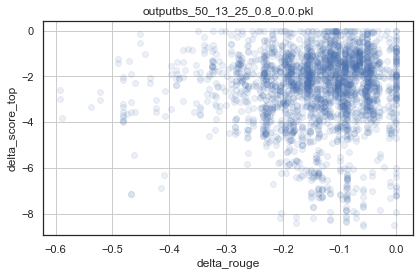

0.019506411879275737
0.019506411879275737


In [41]:
df['delta_score_low'] = df.apply(lambda row: row.score - row.low_score, axis=1)
df['delta_score_top'] = df.apply(lambda row: row.score - row.top_score, axis=1)
df['delta_rouge'] = df.apply(lambda row: row.rouge - row.top_rouge, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", color_codes=True)

fig, ax = plt.subplots()

ax.scatter(x=df['delta_rouge'], y=df['delta_score_top'],alpha=0.1)

ax.set_xlabel(r'delta_rouge')
ax.set_ylabel(r'delta_score_top')
ax.set_title(f"{dump_name}")

ax.grid(True)
fig.tight_layout()
plt.show()

print(df['delta_score_top'].corr(df['delta_rouge'],method='pearson'))
print(df['delta_rouge'].corr(df['delta_score_top'],method='pearson'))

# g = sns.jointplot(data=df, x="delta_score_top", y="delta_rouge", )

# Use JointGrid directly to draw a custom plot
# g = sns.JointGrid(data=df, x="delta_score_top", y="delta_rouge")
# g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
# g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

# fig.tight_layout()
# plt.show()

[1.0, 1.0019786096256684, 1.0119005930933582, 1.0383838729218258, 1.0869913415002526, 1.1610751603351175, 1.249481409232339, 1.4029887083368842, 1.8696011983890817]


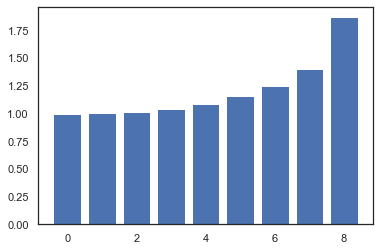

In [42]:
x = df['quant']
l = len(x[0])
import statistics

avg = [ statistics.mean([m[i] for m in x])  for i in range(l)]
print(avg)
x = list(range(0,9,1))
# sns.barplot(x=x,y=avg)
plt.bar(x=x,height=avg)
plt.show()